In [1]:
%matplotlib inline
%reload_ext autoreload
%autoreload 2
import numpy as np
import matplotlib.pyplot as plt
from classify_grid import *
import os, ebf
from astropy.io import ascii
import time
#import mwdust

In [2]:
# load MIST models
homedir=os.path.expanduser('~/')
model=ebf.read('/Users/daniel/science/models/MIST/mesa.ebf')

In [3]:
# prelims to manipulate some model variables (to be automated soon ...)
model['rho']=np.log10(model['rho'])
# next line turns off Dnu scaling relation corrections
model['fdnu'][:]=1.
model['avs']=np.zeros(len(model['teff']))
model['dis']=np.zeros(len(model['teff']))

In [5]:
# next 2 lines allow to use a reddening model (needs galactic coordinates)
#x.addcoords(338.3683920,-9.0227690)
#dustmodel = mwdust.Combined15()

In [6]:
# initilize class with observables


teff 137568
feh 14638
number of models used within non-phot obsconstraints: 14638
number of models incl reddening: 14638
number of models after phot constraints: 14638
----


teff 5769.98303292 59.301879621 61.1918871394
logg 4.44001143404 0.0493921367331 0.0624645610514
feh -0.0255567200714 0.0445493167628 0.0450474462275
rad 0.982111426286 0.0662901661424 0.0483039544974
mass 0.979819851729 0.0291813906507 0.032312653344
rho 1.01690416925 0.181902021448 0.19079872552
lum 0.96523213481 0.14624805649 0.110979645017
age 4.37936325286 2.72922343906 2.61180062653
dis 209.661768376 14.5119797338 10.3918858277


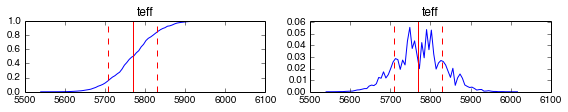

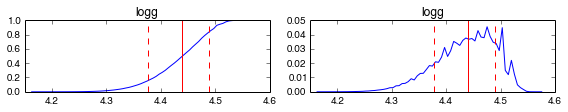

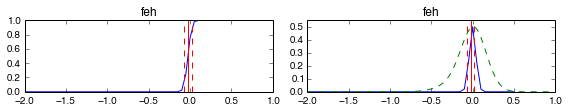

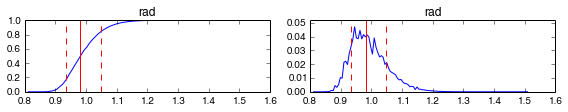

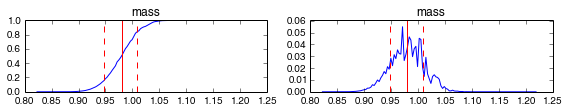

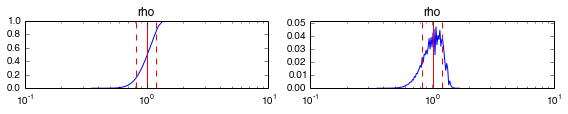

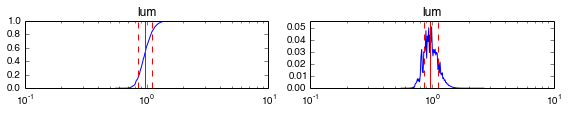

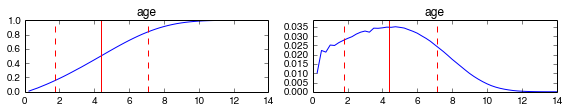

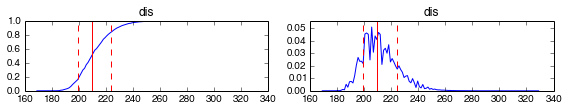

In [6]:
x=obsdata()
# add any combiantion of observables
# Teff, logg, FeH + uncertainties
x.addspec([5777.,4.44,0.0],[60.,0.07,0.04])
# numax & Dnu + uncertainties
#x.addseismo([1240.,63.5],[70.,1.5])
# 2MASS photometry 
x.addjhk([-99,-99,10.0],[0,0,0.02])
# Sloan photometry
#x.addgriz([11.776,11.354,11.238,11.178],[0.02,0.02,0.02,0.02])
paras=classify(input=x,model=model,dustmodel=0.,useav=0.5)

teff 137309
feh 37334
number of models used within non-phot obsconstraints: 37334
number of models incl reddening: 4853420
number of models after phot constraints: 4853420
----


teff 5773.15397954 57.9414175526 60.7655321549
logg 4.43233273135 0.0573393121968 0.0811500598853
feh -0.0295064169983 0.100603604078 0.100112948524
rad 0.990559319148 0.0915027544364 0.0660243539058
mass 0.977014864234 0.0515099192241 0.0509290287432
rho 0.987785628329 0.215867727654 0.234825647849
lum 0.982560769776 0.202302698879 0.142822861346
age 4.6768057998 3.24853118625 2.97313404774
avs 0.3425 0.442 0.442
dis 213.37424297 20.3505213397 15.3697917112


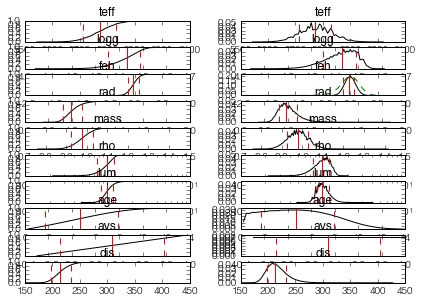

In [16]:
paras=classify(input=x,model=model,dustmodel=0.)

Populating the interactive namespace from numpy and matplotlib
teff 273827
feh 5281
number of models used within non-phot obsconstraints: 5281
number of models incl reddening: 686530
number of models after phot constraints: 686530
----


/Users/petigura/anaconda/lib/python2.7/site-packages/IPython/core/magics/pylab.py:161: UserWarning: pylab import has clobbered these variables: ['norm', 'copy', 'random']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


teff 5064.26900311 60.6930450844 58.4178496891
logg 3.56137341702 0.0882436178957 0.094117013722
feh 0.00286567686621 0.0399950560184 0.0425170820075
rad 3.26172402243 0.533841188968 0.450366468417
mass 1.4369489294 0.160428114218 0.151204073985
rho 0.0402939456092 0.0164709825214 0.0123790786578
lum 6.31466855586 2.16214449503 1.62063257247
age 2.79498314414 1.33830206529 0.809770095785
avs 0.3425 0.442 0.442
dis 649.590983816 106.471770417 90.451153985


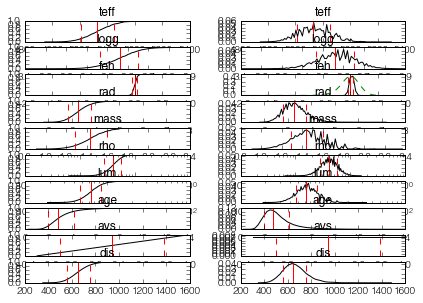

In [17]:
# add any combiantion of observables
# Teff, logg, FeH + uncertainties
#x.addspec([5109.23,3.49595,0.0380301],[60.,0.10,0.04])
x.addspec([5109.23,3.49595,0.0380301],[60.,0.1,0.04])
# numax & Dnu + uncertainties
#x.addseismo([1240.,63.5],[70.,1.5])
# 2MASS photometry 
x.addjhk([-99,-99,10.0],[0,0,0.02])
# Sloan photometry
#x.addgriz([11.776,11.354,11.238,11.178],[0.02,0.02,0.02,0.02])

# run classification
%pylab inline

paras=classify(input=x,model=model,dustmodel=0.)
gcf().set_tight_layout(True)

In [17]:
from scipy.interpolate import interp1d

In [18]:
interp1d?

1.86656246015e-15 0.05 0.05


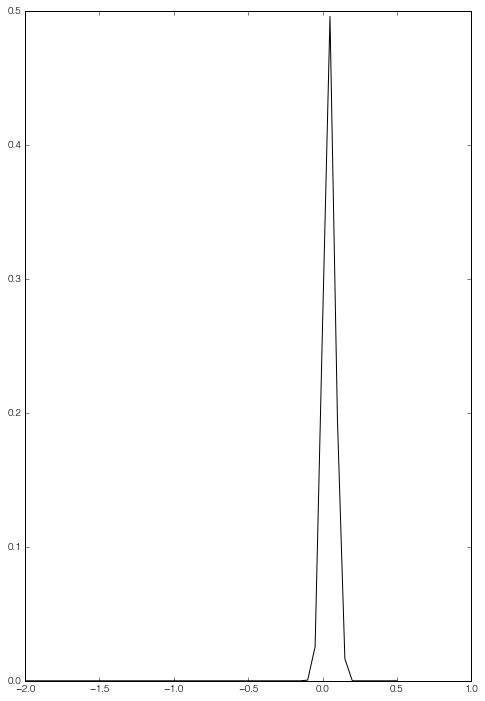

In [9]:
# print mass median +/- 1 sigma, plot posterior
print paras.feh,paras.fehep,paras.fehem
plt.plot(paras.fehpx,paras.fehpy)

In [ ]:
# plot teff posterior
plt.plot(paras.teffpx,paras.teffpy)

In [ ]:
# print age median +/- 1 sigma, plot posterior
print paras.age,paras.ageep,paras.ageem
plt.plot(paras.agepx,paras.agepy)

In [ ]:
# print mass median +/- 1 sigma, plot posterior
print paras.mass,paras.massep,paras.massem
plt.plot(paras.masspx,paras.masspy)

In [ ]:
# print mass median +/- 1 sigma, plot posterior
print paras.feh,paras.fehep,paras.fehem
plt.plot(paras.fehpx,paras.fehpy)

In [ ]:
# delete numax & Dnu constraint
x.addseismo([-99.,-99.],[70.,1.5])
# add parallax with a 3% uncertainty
x.addplx(1./372.,1./372.*0.03)

In [ ]:
# re-run classification
paras=classify(input=x,model=model,dustmodel=0.,doplot=0)

In [ ]:
# print age median +/- 1 sigma, plot posterior
print paras.age,paras.ageep,paras.ageem
plt.plot(paras.agepx,paras.agepy)